# Background:
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Here are what the columns represent:
* id : listing ID
* name : name of the listing
* host_id : host ID
* host_name : name of the host
* neighbourhood_group : location  区
* neighbourhood : area       街区
* latitude : latitude coordinates   纬度
* longitude : longitude coordinates   经度
* room_type : listing space type    房间类型
* price : price in dollars      价格
* minimum_nights : amount of nights minimum   客人可入住的最短租期
* number_of_reviews : number of reviews    评论数量
* last_review : latest review    上一次评论日期
* reviews_per_month : number of reviews per month    平均每个月评论数量
* calculated_host_listings_count : amount of listing per host   有多少间房
* availability_365 : number of days when listing is available for booking   一年有多少天可用

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

In [51]:
abnyc = pd.read_csv("AB_NYC_2019.csv")

In [52]:
abnyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [53]:
abnyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [54]:
abnyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# DATA CLEANING

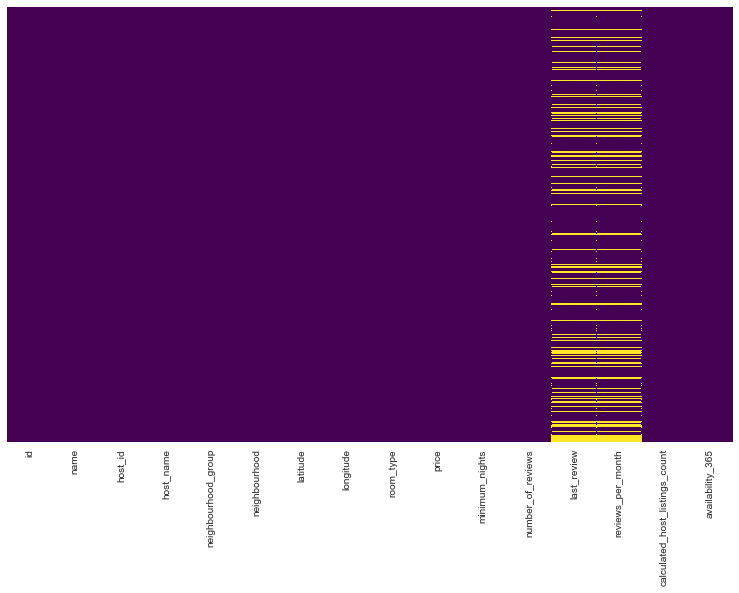

In [55]:
plt.figure(figsize=(13,8))
sns.heatmap(abnyc.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [56]:
abnyc.drop(["host_id","name","id","host_name","last_review"], axis=1, inplace=True)

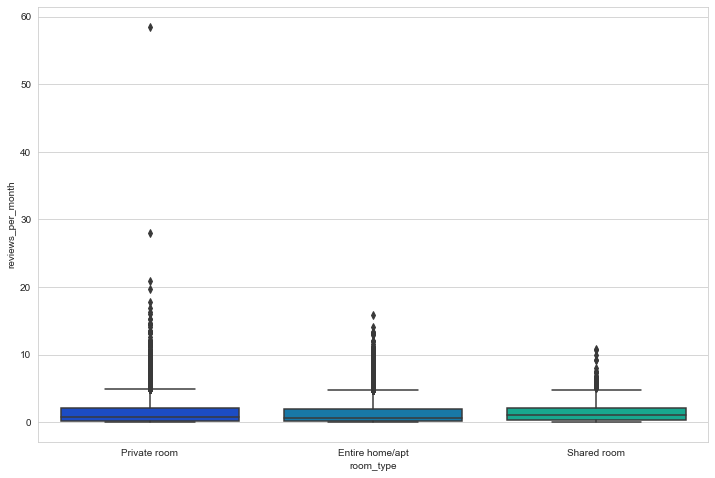

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x='room_type', y='reviews_per_month', data=abnyc, palette='winter')

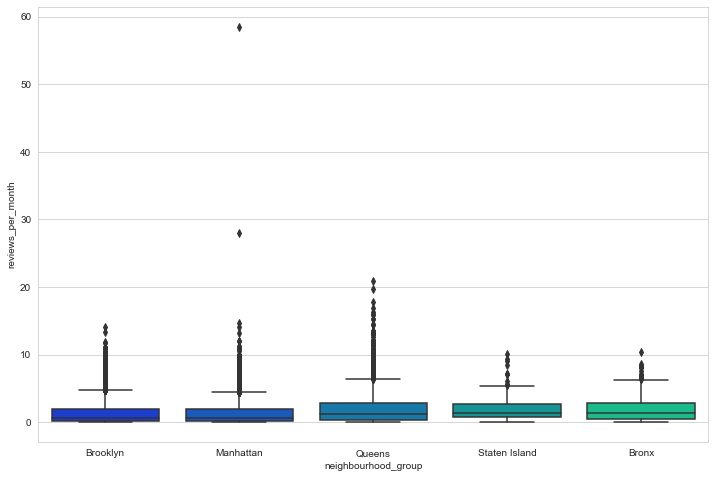

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x='neighbourhood_group', y='reviews_per_month', data=abnyc, palette='winter')

In [59]:
abnyc.fillna({'reviews_per_month':1.37}, inplace=True)
abnyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [60]:
abnyc.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.372559,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# EDA

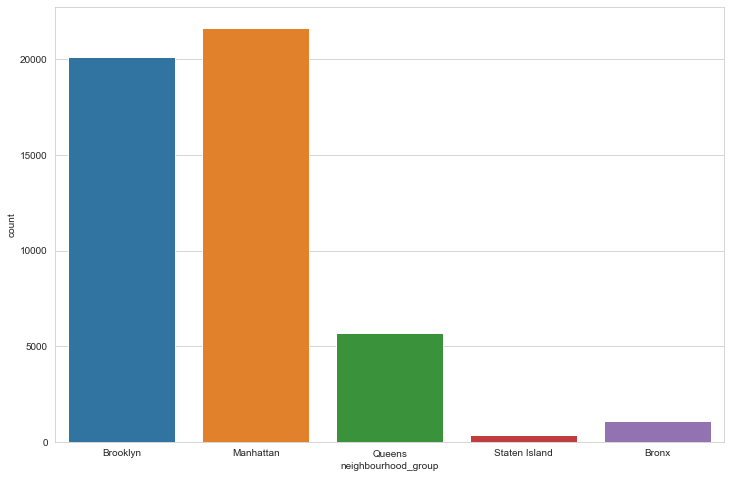

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(abnyc['neighbourhood_group'])

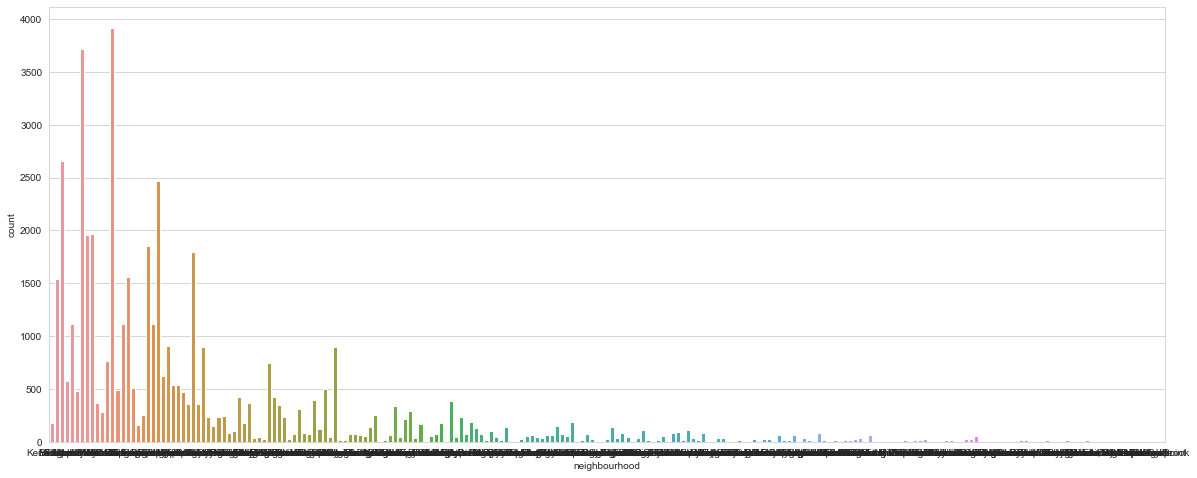

In [62]:
plt.figure(figsize=(20,8))
sns.countplot(abnyc['neighbourhood'])

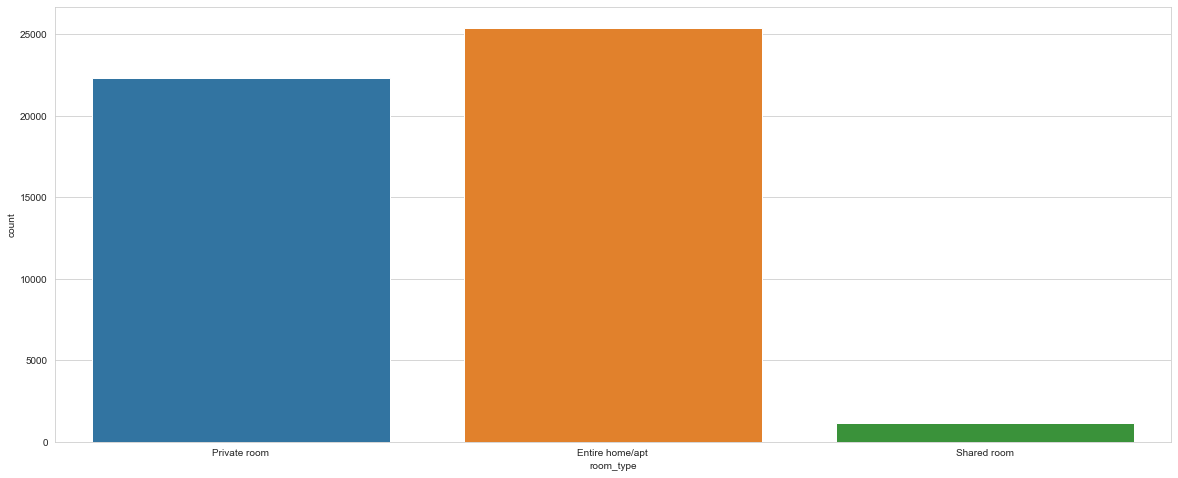

In [63]:
plt.figure(figsize=(20,8))
sns.countplot(abnyc['room_type'])

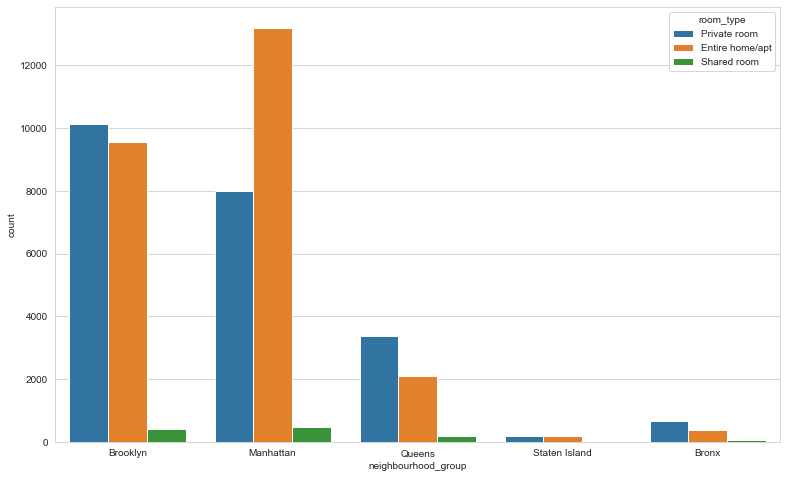

In [64]:
plt.figure(figsize=(13,8))
sns.set_style('whitegrid')
sns.countplot(x = "neighbourhood_group",hue = "room_type",data = abnyc)

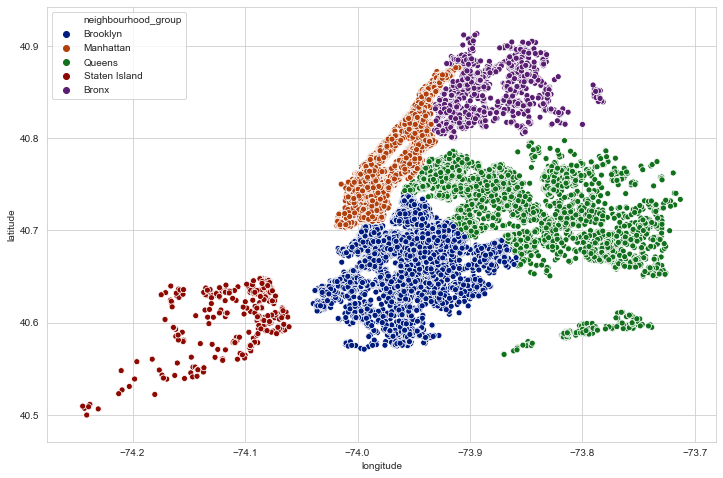

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(abnyc.longitude,abnyc.latitude,hue=abnyc.neighbourhood_group,palette='dark')

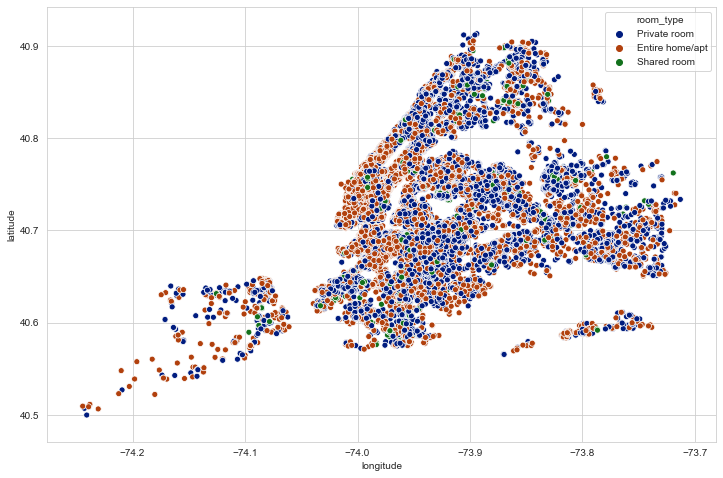

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(abnyc.longitude,abnyc.latitude,hue=abnyc.room_type,palette='dark')

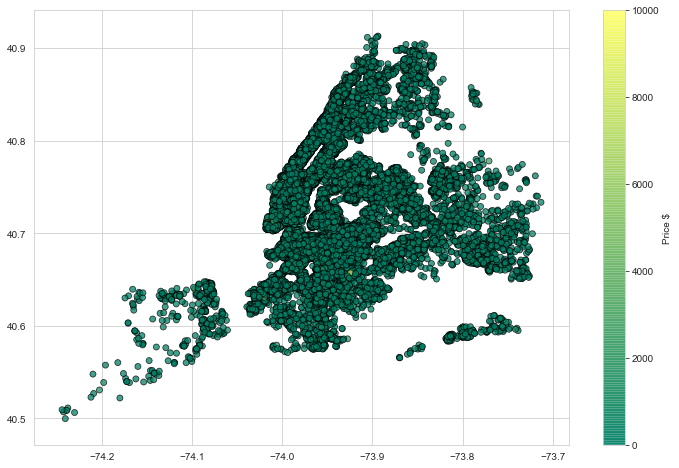

In [67]:
plt.figure(figsize=(12, 8))
plt.scatter(abnyc.longitude, abnyc.latitude, c=abnyc.price,cmap='summer', edgecolor='black',linewidth=0.8, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Price $')

<Figure size 864x576 with 0 Axes>

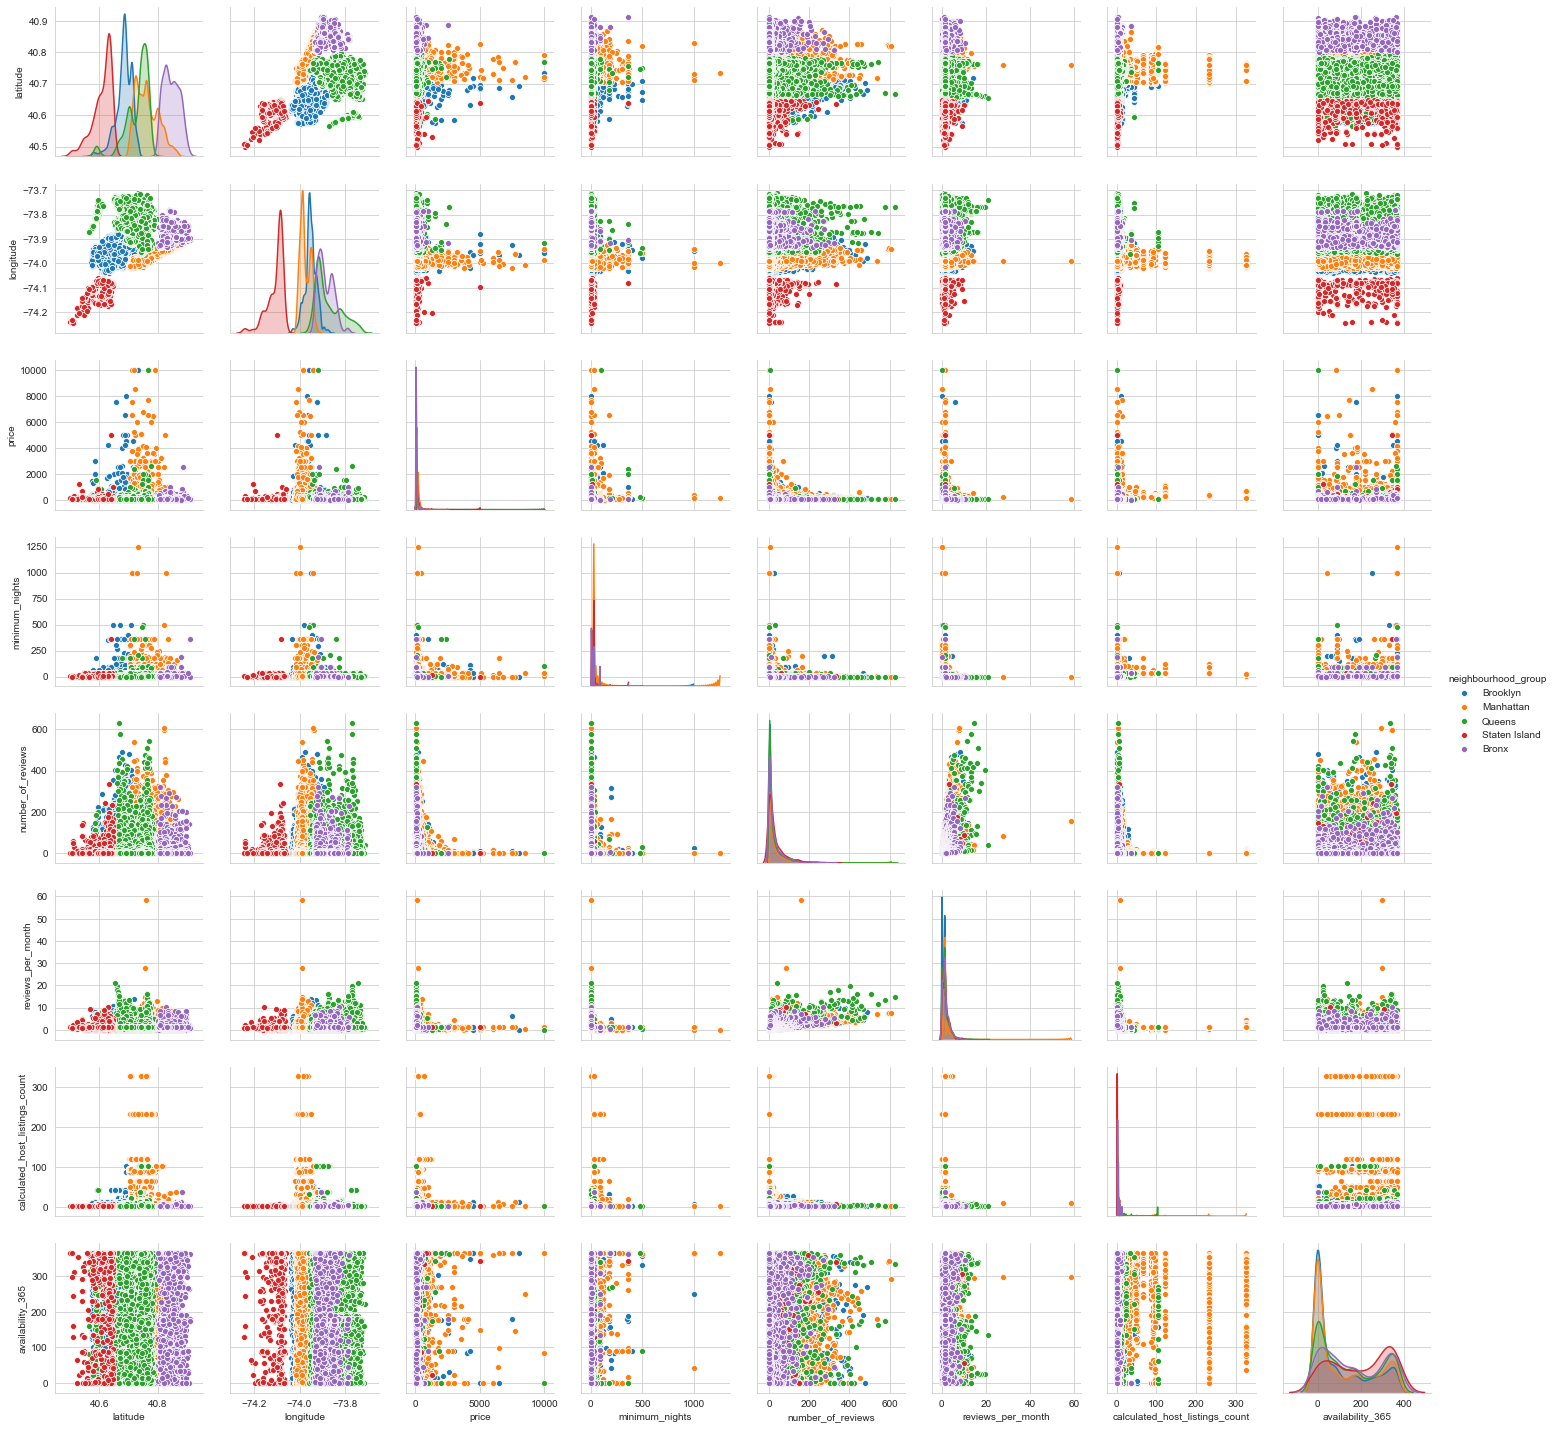

In [68]:
plt.figure(figsize=(12,8))
sns.pairplot(abnyc,hue =  'neighbourhood_group')

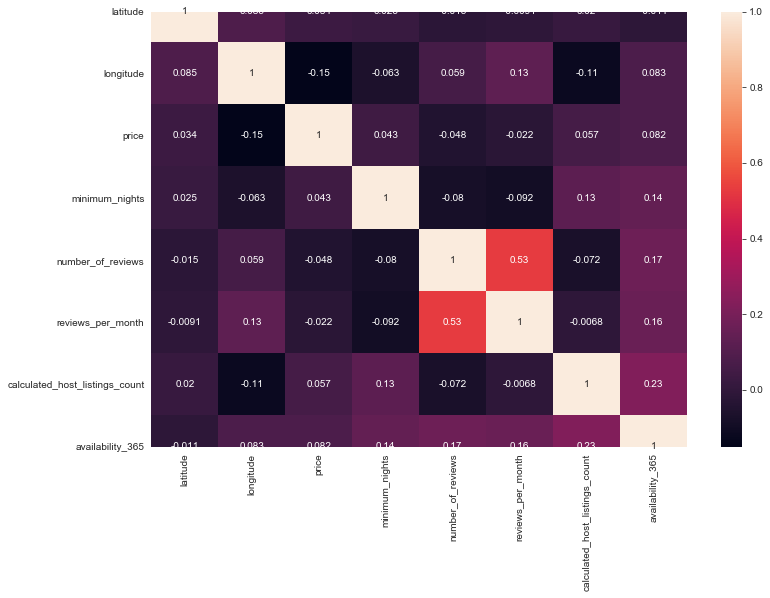

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(abnyc.corr(),annot=True)

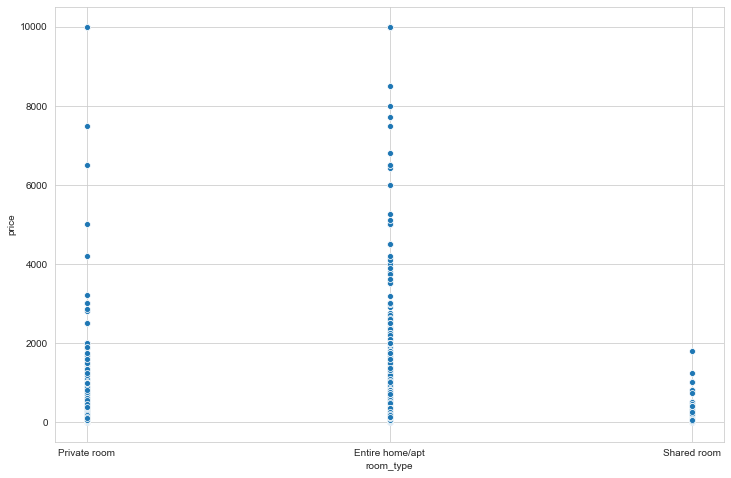

In [70]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x='room_type',y='price',data=abnyc)

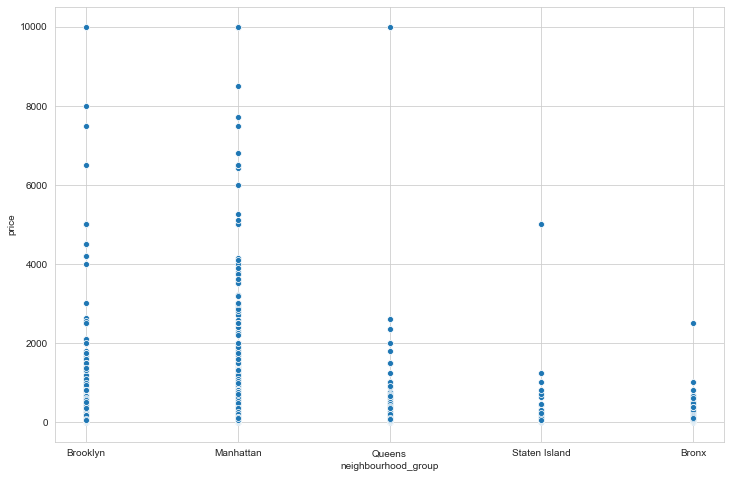

In [71]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x='neighbourhood_group',y='price',data=abnyc)

<Figure size 864x576 with 0 Axes>

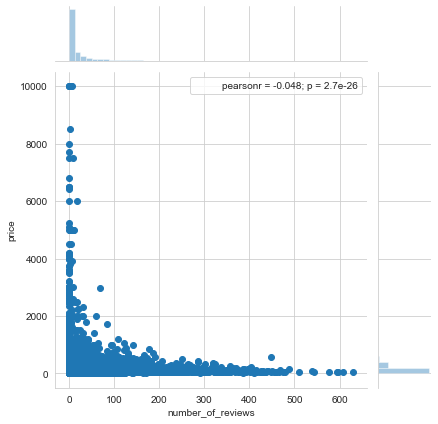

In [72]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.jointplot(x='number_of_reviews',y='price',data=abnyc,kind = "scatter").annotate(stats.pearsonr)

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(abnyc['price'])

# Regression Analysis

In [73]:
cat_feats = ['neighbourhood_group']

In [74]:
data1 = pd.get_dummies(abnyc,columns=cat_feats)

In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
neighbourhood                        48895 non-null object
latitude                             48895 non-null float64
longitude                            48895 non-null float64
room_type                            48895 non-null object
price                                48895 non-null int64
minimum_nights                       48895 non-null int64
number_of_reviews                    48895 non-null int64
reviews_per_month                    48895 non-null float64
calculated_host_listings_count       48895 non-null int64
availability_365                     48895 non-null int64
neighbourhood_group_Bronx            48895 non-null uint8
neighbourhood_group_Brooklyn         48895 non-null uint8
neighbourhood_group_Manhattan        48895 non-null uint8
neighbourhood_group_Queens           48895 non-null uint8
neighbourhood_group_Staten Island    48895 non-null uint8
dtypes: float

In [76]:
cat_feats = ['room_type']

In [77]:
data2 = pd.get_dummies(data1,columns=cat_feats)

In [78]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
neighbourhood                        48895 non-null object
latitude                             48895 non-null float64
longitude                            48895 non-null float64
price                                48895 non-null int64
minimum_nights                       48895 non-null int64
number_of_reviews                    48895 non-null int64
reviews_per_month                    48895 non-null float64
calculated_host_listings_count       48895 non-null int64
availability_365                     48895 non-null int64
neighbourhood_group_Bronx            48895 non-null uint8
neighbourhood_group_Brooklyn         48895 non-null uint8
neighbourhood_group_Manhattan        48895 non-null uint8
neighbourhood_group_Queens           48895 non-null uint8
neighbourhood_group_Staten Island    48895 non-null uint8
room_type_Entire home/apt            48895 non-null uint8
room_type_Priv

In [79]:
data2.drop(["neighbourhood","latitude","longitude","reviews_per_month"],axis =1, inplace=True)

In [80]:
data2.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,6,365,0,1,0,0,0,0,1,0
1,225,1,45,2,355,0,0,1,0,0,1,0,0
2,150,3,0,1,365,0,0,1,0,0,0,1,0
3,89,1,270,1,194,0,1,0,0,0,1,0,0
4,80,10,9,1,0,0,0,1,0,0,1,0,0


# Linear Regression

In [81]:
data2.columns

Index(['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [23]:
X = data2[['minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']]
y = data2['price']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-3.80544151e-02 -3.16192627e-01 -1.10462848e-01  1.85170113e-01
 -2.94553247e+01  6.75658308e+00  6.06936808e+01 -1.20844582e+01
 -2.59104810e+01  8.46343703e+01 -2.56967542e+01 -5.89376161e+01]


In [30]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

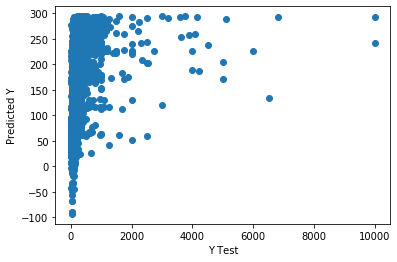

In [31]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 75.5768383544646
MSE: 55453.76581941331
RMSE: 235.4862327598225


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.0934959190013177

In [34]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
minimum_nights,-0.038054
number_of_reviews,-0.316193
calculated_host_listings_count,-0.110463
availability_365,0.185170
neighbourhood_group_Bronx,-29.455325
neighbourhood_group_Brooklyn,6.756583
neighbourhood_group_Manhattan,60.693681
neighbourhood_group_Queens,-12.084458
neighbourhood_group_Staten Island,-25.910481
room_type_Entire home/apt,84.634370


# Decision Tree  and Random Forest

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = data2[[ 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']]
y = data2['price']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
dtree = DecisionTreeRegressor()

In [76]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [77]:
predictions = dtree.predict(X_test)

Text(0, 0.5, 'Predicted Y')

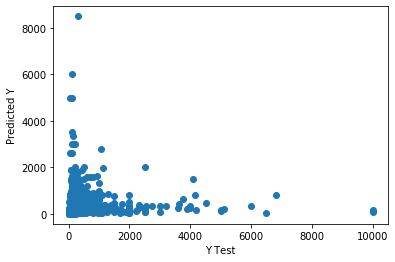

In [78]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [102]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 75.97650645019175
MSE: 47444.049591806186
RMSE: 217.81655031655924


In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

-0.2444819073698179

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfc = RandomForestRegressor(n_estimators=600)

In [83]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
predictions = rfc.predict(X_test)

Text(0, 0.5, 'Predicted Y')

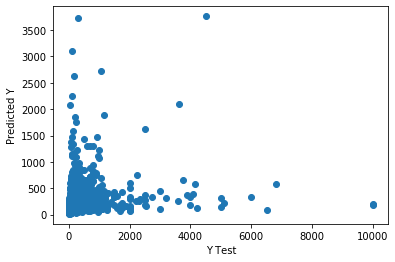

In [85]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [86]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 73.05269272027083
MSE: 56766.81317761039
RMSE: 238.25787117661065


In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.07203150137048675

# Support Vector Machines

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = data2[[ 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']]
y = data2['price']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [91]:
from sklearn.svm import SVR

In [92]:
svr_model = SVR()

In [93]:
svr_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
predictions = svr_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

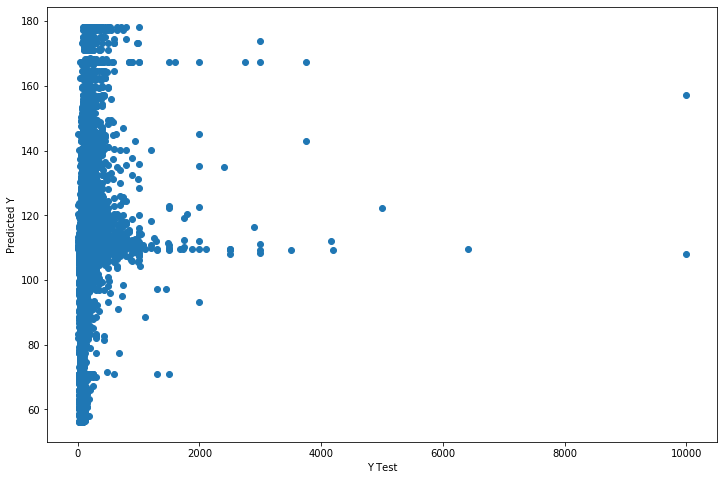

In [95]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [96]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 75.97650645019175
MSE: 47444.049591806186
RMSE: 217.81655031655924


In [97]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

-0.006651793765283021

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [64]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 1.3min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 1.3min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.3min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.3min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.3min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.4min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total= 1.3min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total= 1.1min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 74.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [98]:
grid_predictions = grid.predict(X_test)

Text(0, 0.5, 'Predicted Y')

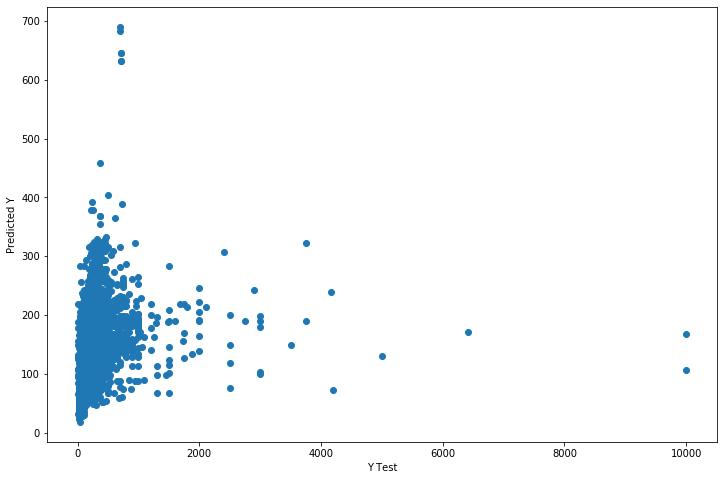

In [99]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test,grid_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [100]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test,grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

MAE: 60.159957968233265
MSE: 43072.45811259102
RMSE: 207.53905201814675


In [101]:
from sklearn.metrics import r2_score
r2_score(y_test,grid_predictions)

0.08610315531733037